In [1]:
__nbid__ = '0051'
__author__  = 'Alice Jacques <alice.jacques@noirlab.edu>, Steve Pothier <steve.pothier@noirlab.edu>, Adam Bolton <adam.bolton@slac.stanford.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['boss_dr16', 'desi_dr1', 'desi_edr', 'sdss_dr16']  
__keywords__ = ['sparcl', 'spectroscopy', 'HowTo', 'sdss spectra', 'desi spectra', 'tutorial']

# Cómo utilizar SPARCL
Laboratorio de análisis de espectros y catálogos recuperables (SPectra Analysis and Retrievable Catalog Lab)

#### (_Traducción de [How_to_use_SPARCL.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/SPARCL/How_to_use_SPARCL.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goalssummary)
* [Avisos Legales y Atribuciones](#disclaimer)
* [Si es necesario, instale la versión más reciente del Cliente SPARCL](#install)
* [Importaciones y configuración](#imports)
* [Autenticación para Data Lab](#authentication)
* [Autenticación para SPARCL](#auth_sparcl)
* [Conjuntos de datos disponibles en SPARCL](#datasets)
* [Obtener nombres de campos predeterminados](#defaultfieldnames)
* [Obtener todos los nombres de los campos](#allfieldnames)
* [Descubrimiento de datos I: uso del método <tt>client.find()</tt> de SPARCL](#datadiscoveryI)
* [Descubrimiento de datos II: uso de la tabla <tt>sparcl.main</tt> de Data Lab](#datadiscoveryII)
* [Recuperar registros por <tt>sparcl_id</tt> usando <tt>client.retrieve()</tt>](#retrieve)
* [Recuperar registros por <tt>specid</tt> usando <tt>client.retrieve_by_specid()</tt>](#retrieve_specid)
* [Reordenar registros de espectro](#reorder)
* [Acceder a campos en registros](#access)
* [Convertir la salida recuperada a Pandas DataFrame o objeto Spectrum1D](#convert)
* [Graficar espectros](#plot)
* [Utilice <tt>client.missing()</tt> para encontrar ID faltantes en la base de datos SPARCL](#missing)

<a class="anchor" id="goalssummary"></a>
## Objetivos y resumen

SPARCL (SPectra Analysis and Retrievable Catalog Lab) es un servicio en línea para el descubrimiento y recuperación de espectros ópticos-infrarrojos unidimensionales ([Juneau et al. 2024](https://doi.org/10.48550/arXiv.2401.05576)). SPARCL está diseñado para funcionar con grandes conjuntos de datos que contienen muchos millones de espectros y para brindar acceso a múltiples conjuntos de datos diferentes a través de métodos comunes. Para obtener más información, consulte la [Guía del usuario de SPARCL](https://astrosparcl.datalab.noirlab.edu/static/SPARCLUserManual.pdf).

Este notebook proporciona una introducción básica al uso del cliente SPARCL (o sparclclient) para buscar y recuperar datos espectroscópicos dentro de un contexto de notebook Python. El sparclclient se conecta al servidor SPARCL en [NSF NOIRLab](https://noirlab.edu/public/) y proporciona acceso al contenido de la base de datos SPARCL.

Para ver los conjuntos de datos actuales y la cantidad de espectros disponibles en la base de datos SPARCL, visite la [página de resumen de SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/).

Para obtener la documentación más reciente de sparclclient, visite el [sitio readthedocs de sparclclient](https://sparclclient.readthedocs.io/en/latest/).

Los comentarios sobre SPARCL (preguntas, comentarios, casos de uso científico, solicitudes de funciones, informes de errores, mensajes de error confusos, etc.) se pueden enviar a datalab-spectro@noirlab.edu. Para informes de errores y mensajes de error confusos, es útil incluir: un registro de *lo que hizo*, *el resultado que obtuvo* y *el resultado que esperaba*.

Vea nuestros notebooks de casos de uso científicos que utilizan SPARCL:
- [Introducción a DESI First Data Release (DR1) en Astro Data Lab](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/DESI/01_Intro_a_DESI_DR1.ipynb )
- [Comparación de espectros SDSS y DESI usando SPARCL](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/DESI/02_Comparacion_DESI_SDSS.ipynb)
- [Apilamiento de espectros SDSS de galaxias seleccionadas del diagrama BPT](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GalaxiasConLineasDeEmision/01_GalaxiasLineasEm_EspectrosApilados.ipynb)
- [Recortes de imágenes de múltiples longitudes de onda y espectros SDSS de galaxias activas con relaciones extremas de líneas de emisión](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GalaxiasConLineasDeEmision/02_GalaxiasLineasEm_Atipicas.ipynb)

Y nuestros otros notebooks de instrucciones que utilizan SPARCL:
- [Obtener espectros con SPARCL y graficarlos con Jdaviz](https://github.com/astro-datalab/notebooks-latest-es/blob/master/04_ComoHacer/SPARCL/Graficar_Espectros_con_Jdaviz.ipynb)
- [Obtener espectros con SPARCL y graficarlos con prospect](https://github.com/astro-datalab/notebooks-latest-es/blob/master/04_ComoHacer/SPARCL/Graficar_Espectros_con_Prospect.ipynb)

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="install"></a>

### Si es necesario, instale la versión más reciente del Cliente SPARCL:
Si está utilizando el servidor de notebooks Jupyter de Astro Data Lab, no necesita ejecutar esta celda.
### NOTA: Después de instalar la versión más reciente, reinicie su kernel.

In [2]:
# # Descomentar lo siguiente sólo si el cliente SPARCL aún no está instalado
# !pip instalar --actualizar sparclclient

<a class="anchor" id="imports"></a>
## Importaciones y configuración

In [1]:
# Importaciones SPARCL
from sparcl.client import SparclClient

# importaciones de terceros
import numpy as np
import astropy.units as u
from specutils import Spectrum1D
from astropy.nddata import InverseVariance
from astropy.convolution import convolve, Gaussian1DKernel
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# importaciones de DataLab
from dl import queryClient as qc
from dl import authClient as ac
from getpass import getpass

# configuración predeterminada de gráficos
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (14,8)

<a class="anchor" id="authentication"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [6]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
# ac.quiénAmI()

#### Ahora creamos una instancia de cliente SPARCL:

In [2]:
client = SparclClient()
client

(sparclclient:1.2.6, api:12.0, https://astrosparcl.datalab.noirlab.edu/sparc, client_hash=a0b29838a228c319a234b401069c2b82c7636161, verbose=False, connect_timeout=1.1, read_timeout=5400.0, announcement=True)

<a class="anchor" id="auth_sparcl"></a>
# Autenticación para SPARCL
Se puede acceder a todos los conjuntos de datos públicos de SPARCL sin iniciar sesión explícitamente. Sin embargo, algunos conjuntos de datos son privados y solo pueden acceder a ellos usuarios autorizados. Si es un usuario autorizado y desea iniciar sesión en SPARCL, elimine el comentario de la próxima celda e ingrese su nombre de usuario y contraseña de NOIRLab CSDC SSO. Si necesita crear una cuenta, regístrese en https://sso.csdc.noirlab.edu/account/signup/. Si tiene algún problema, envíe un correo electrónico a datalab-spectro@noirlab.edu con su nombre, apellido y dirección de correo electrónico (la misma que utilizó para crear su cuenta SSO de NOIRLab CSDC).

Para cerrar sesión en SPARCL después de una sesión, utilice:
```
client.logout()
```

Para obtener ayuda con la autenticación/autorización SPARCL, contáctenos en datalab-spectro@noirlab.edu

In [9]:
# client.login(input("Ingrese el nombre de usuario de SSO: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))

#### Vea a qué conjuntos de datos tiene acceso:
**Nota:** si no ha iniciado sesión o si su nombre de usuario de SSO no está en la lista autorizada de usuarios de SPARCL, solo verá conjuntos de datos públicos

In [3]:
client.authorized

{'Loggedin_As': 'Anonymous',
 'Authorized_Datasets': {'BOSS-DR16', 'DESI-DR1', 'DESI-EDR', 'SDSS-DR16'}}

<a class="anchor" id="datasets"></a>
## Conjuntos de datos disponibles en SPARCL
Enumere todos los conjuntos de datos actualmente disponibles del servidor/URL asociado con el cliente

In [4]:
client.all_datasets

{'BOSS-DR16',
 'BOSS-DR17',
 'DESI-DR1',
 'DESI-EDR',
 'SDSS-DR16',
 'SDSS-DR17',
 'SDSS-DR17-test'}

<a class="anchor" id="defaultfieldnames"></a>
## Obtener nombres de campos predeterminados
Obtiene campos etiquetados como "predeterminados" que son comunes a todos los conjuntos de datos en "dataset_list" pasados ​​a la función. Si `dataset_list` es None (el valor predeterminado), la función devuelve la intersección de los campos 'predeterminados' en todos los conjuntos de datos disponibles actualmente en la base de datos SPARC.

In [5]:
client.get_default_fields?

Signature: client.get_default_fields(*, dataset_list=None)
Docstring:
Get fields tagged as 'default' that are in DATASET_LIST.
These are the fields used for the DEFAULT value of the include
parameter of client.retrieve().

Args:
    dataset_list (:obj:`list` of :obj:`str`, optional): List of
        data sets from which to get the default fields. Defaults
        to None, which will return the intersection of default
        fields in all data sets hosted on the SPARCL database.

Returns:
    List of fields tagged as 'default' from DATASET_LIST.

Example:
    >>> client = SparclClient()
    >>> client.get_default_fields()
    ['dec', 'flux', 'ra', 'sparcl_id', 'specid', 'wavelength']
File:      /data0/sw/anaconda3/lib/python3.10/site-packages/sparcl/client.py
Type:      method

In [6]:
client.get_default_fields()

['dec', 'flux', 'ra', 'sparcl_id', 'specid', 'wavelength']

<a class="anchor" id="allfieldnames"></a>
## Obtener todos los nombres de los campos
Obtiene los campos etiquetados como 'todos' que son comunes a todos los conjuntos de datos en "dataset_list" pasados a la función. Si `dataset_list` es None (el valor predeterminado), la función devuelve la intersección de 'todos' los campos en todos los conjuntos de datos disponibles actualmente en la base de datos SPARC.

In [7]:
client.get_all_fields?

Signature: client.get_all_fields(*, dataset_list=None)
Docstring:
Get fields tagged as 'all' that are in DATASET_LIST.
These are the fields used for the ALL value of the include parameter
of client.retrieve().

Args:
    dataset_list (:obj:`list` of :obj:`str`, optional): List of data
        sets from which to get all fields. Defaults to None, which
        will return the intersection of all fields in all data sets
        hosted on the SPARCL database.

Returns:
    List of fields tagged as 'all' from DATASET_LIST.

Example:
    >>> client = SparclClient()
    >>> client.get_all_fields()
    ['data_release', 'datasetgroup', 'dateobs', 'dateobs_center', 'dec', 'exptime', 'flux', 'instrument', 'ivar', 'mask', 'model', 'ra', 'redshift', 'redshift_err', 'redshift_warning', 'site', 'sparcl_id', 'specid', 'specprimary', 'spectype', 'survey', 'targetid', 'telescope', 'wave_sigma', 'wavelength', 'wavemax', 'wavemin']
File:      /data0/sw/anaconda3/lib/python3.10/site-packages/sparcl/client.

In [8]:
print(sorted(client.get_all_fields()))

['data_release', 'datasetgroup', 'dateobs', 'dateobs_center', 'dec', 'exptime', 'flux', 'instrument', 'ivar', 'mask', 'model', 'ra', 'redshift', 'redshift_err', 'redshift_warning', 'site', 'sparcl_id', 'specid', 'specprimary', 'spectype', 'survey', 'targetid', 'telescope', 'wave_sigma', 'wavelength', 'wavemax', 'wavemin']


In [10]:
print(sorted(client.get_all_fields(dataset_list=['SDSS-DR16', 'BOSS-DR16'])))

['ancillary_target1', 'ancillary_target2', 'anyandmask', 'anyormask', 'bluefiber', 'boss_specobj_id', 'boss_target1', 'boss_target2', 'calibflux', 'calibflux_ivar', 'chi68p', 'chunk', 'class_noqso', 'class_person', 'comments_person', 'cx', 'cy', 'cz', 'data_release', 'datasetgroup', 'dateobs', 'dateobs_center', 'dec', 'deredsn2', 'designid', 'dof', 'eboss_target0', 'eboss_target1', 'eboss_target2', 'eboss_target_id', 'elodie_bv', 'elodie_dof', 'elodie_feh', 'elodie_filename', 'elodie_logg', 'elodie_object', 'elodie_rchi2', 'elodie_sptype', 'elodie_teff', 'elodie_z', 'elodie_z_err', 'elodie_z_modelerr', 'exptime', 'fiberid', 'firstrelease', 'flux', 'fluxobjid', 'fracnsighi', 'fracnsiglo', 'fracnsigma', 'instrument', 'ivar', 'lambda_eff', 'legacy_target1', 'legacy_target2', 'marvels_target1', 'marvels_target2', 'mask', 'mjd', 'model', 'npoly', 'nspecobs', 'nturnoff', 'objid', 'plate', 'plateid', 'platequality', 'platerun', 'platesn2', 'primtarget', 'programname', 'ra', 'rchi2', 'rchi2dif

In [11]:
print(sorted(client.get_all_fields(dataset_list=['DESI-DR1'])))

['bgs_target', 'chi2', 'cmx_target', 'coadd_fiberstatus', 'coadd_numexp', 'coadd_numnight', 'coadd_numtile', 'coeff', 'data_release', 'datasetgroup', 'dateobs', 'dateobs_center', 'dec', 'deltachi2', 'desi_target', 'desiname', 'exptime', 'fa_target', 'fa_type', 'flux', 'healpix', 'instrument', 'ivar', 'main_nspec', 'main_primary', 'mask', 'mean_delta_x', 'mean_delta_y', 'mean_fiber_dec', 'mean_fiber_ra', 'mean_mjd', 'mean_psf_to_fiber_specflux', 'model', 'mws_target', 'ncoeff', 'npixels', 'numobs_init', 'objtype', 'obsconditions', 'plate_dec', 'plate_ra', 'pmdec', 'pmra', 'priority_init', 'program', 'ra', 'redshift', 'redshift_err', 'redshift_warning', 'ref_epoch', 'rms_delta_x', 'rms_delta_y', 'scnd_target', 'site', 'sparcl_id', 'specid', 'specprimary', 'spectype', 'spgrpval', 'std_fiber_dec', 'std_fiber_ra', 'subpriority', 'subtype', 'survey', 'sv1_bgs_target', 'sv1_desi_target', 'sv1_mws_target', 'sv1_scnd_target', 'sv2_bgs_target', 'sv2_desi_target', 'sv2_mws_target', 'sv2_scnd_targ

<a class="anchor" id="datadiscoveryI"></a>
## Descubrimiento de datos I: uso del método `client.find()` de SPARCL
La primera forma de descubrir sus datos es utilizando el método `client.find()` de SPARCL, que le permite buscar registros en la base de datos SPARCL basándose en ciertos parámetros pasados ​​a la función. Solo los campos principales pueden estar en los parámetros "campos externos" y "restricciones". Las descripciones de todos los campos, incluidos los campos principales, se encuentran [aquí](https://astrosparcl.datalab.noirlab.edu/sparc/sfc/). Los tipos de restricciones de los campos principales de SPARCL son:


| Nombre del campo | Tipo de restricción | Ejemplo |
|:----------------|:---------------|:-------|
| data_release | Lista de valores permitidos<br>de [Categóricas SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/cats/) | ['DESI-EDR', 'BOSS-DR16', 'SDSS-DR16']
| datasetgroup | Lista de valores permitidos<br>de [Categóricas SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/cats/) | ['DESI', 'SDSS_BOSS']
| dateobs_center | Rango de valores | ['2013-03-14T10:16:17Z',<br>'2014-05-24T12:10:00Z']
| dec | Rango de valores | [2.03, 7.76]
| exptime | Rango de valores | [3603.46, 3810.12]
| instrument | Lista de valores permitidos<br>de [Categóricas SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/cats/) | ['SDSS', 'JEFE', 'DESI']
| ra | Rango de valores (puede que no<be>"RA envolvente=0) | [44.53, 47.96]
| redshift | Rango de valores | [0,5, 0,9]
| redshift_err | Rango de valores | [0,000225, 0,000516]
| redshift_warning | Lista de valores | [0, 3, 5]
| sparcl_id | Lista de valores (pero no<br>destinados al descubrimiento de datos) | ['00001658-460c-4da1-987d-e493d8c9b89b',<br>'000017b6-56a2-4f87-8828-3a3409ba1083']
| site | Lista de valores permitidos<br>de [Categóricas SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/cats/) |  ['apo', 'kpno']
| specid | Lista de valores | [6988698046080241664, 6971782884823945216]
| spectype | Lista de valores permitidos<br>de [Categóricas SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/cats/) | ['GALAXIA', 'ESTRELLA', 'QSO']
| specprimary | Lista de valores (pero normalmente<br>solo incluiría 1 si<br>se usa para restricciones de descubrimiento de datos<br>) | [1]
| targetid | Lista de valores | [1237679502171374316, 1237678619584692841]
| telescope | Lista de valores permitidos<br>de [Categóricas SPARCL](https://astrosparcl.datalab.noirlab.edu/sparc/cats/) | ['préstamo25m', 'kp4m']
| wavemin | Rango de valores | [3607, 3608]
| wavemax | Rango de valores | [10363, 10364]

In [12]:
client.find?

Signature:
client.find(
    outfields=None,
    *,
    constraints={},
    limit=500,
    sort=None,
    verbose=None,
)
Docstring:
Find records in the SPARCL database.

Args:
    outfields (:obj:`list` of :obj:`str`, optional): List of
        fields to return. Only CORE fields may be passed to
        this parameter. Defaults to None, which will return
        only the sparcl_id and _dr fields.

    constraints (:obj:`dict`, optional): Key-Value pairs of
        constraints to place on the record selection. The Key
        part of the Key-Value pair is the field name and the
        Value part of the Key-Value pair is a list of values.
        Defaults to no constraints. This will return all records in the
        database subject to restrictions imposed by the ``limit``
        parameter.

    limit (:obj:`int`, optional): Maximum number of records to
        return. Defaults to 500.

    sort (:obj:`list`, optional): Comma separated list of fields
        to sort by. Defaults to No

#### Definir los campos que queremos que se devuelvan (`outfields`) y las restricciones (`constraints`):

In [13]:
out = ['sparcl_id', 'ra', 'dec', 'redshift', 'spectype', 'data_release', 'redshift_err']
cons = {'spectype': ['GALAXY'],
        'redshift': [0.5, 0.9],
        'data_release': ['DESI-DR1', 'SDSS-DR16', 'BOSS-DR16']}

#### Ejecutar el método `client.find()` con nuestros parámetros:
El argumento `límit` aquí se utiliza solo con fines de demostración y aquí simplemente devuelve solo los primeros 20 resultados.

In [14]:
found_I = client.find(outfields=out, constraints=cons, limit=20)
["%s, %s, %f, %f, %f" % (f.sparcl_id, f.data_release, f.ra, f.redshift, f.redshift_err)
 for f in found_I.records]

['000003e8-8a05-11ef-a71d-525400f334e1, DESI-DR1, 60.007777, 0.782049, 0.000012',
 '00000411-8603-11ef-a5eb-525400f334e1, DESI-DR1, 209.980362, 0.642873, 0.000077',
 '00000f02-a2dc-11ee-ac91-525400ad1336, BOSS-DR16, 230.697100, 0.522124, 0.000107',
 '00001191-8bdd-11ef-b09e-525400f334e1, DESI-DR1, 125.558443, 0.839844, 0.000140',
 '0000187f-8bde-11ef-9bec-525400f334e1, DESI-DR1, 124.402481, 0.871175, 0.000003',
 '000019a8-8669-11ef-a9c4-525400f334e1, DESI-DR1, 199.708772, 0.740890, 0.000229',
 '00001b3a-a41b-11ee-8210-525400ad1336, BOSS-DR16, 9.635124, 0.542893, 0.000181',
 '00001cb5-87ee-11ef-bcb3-525400f334e1, DESI-DR1, 198.183387, 0.787802, 0.000003',
 '00001fc6-85f3-11ef-ba36-525400f334e1, DESI-DR1, 224.281279, 0.548497, 0.000099',
 '000021bf-88ae-11ef-a6c2-525400f334e1, DESI-DR1, 339.684280, 0.774977, 0.000302',
 '00002380-8a7c-11ef-9881-525400f334e1, DESI-DR1, 121.999478, 0.808449, 0.000036',
 '00002da0-8b8d-11ef-ba9d-525400f334e1, DESI-DR1, 32.640943, 0.688018, 0.000130',
 '0000

<a class="anchor" id="datadiscoveryII"></a>
## Descubrimiento de datos II: uso de la tabla `sparcl.main` de Data Lab
La segunda forma de descubrir sus datos es consultando la tabla `sparcl.main` alojada en Astro Data Lab. Esta tabla contiene las siguientes columnas:

In [16]:
print(qc.schema('sparcl.main'))


Schema: sparcl
 Table: main

     Column Name   Description
     -----------   -----------
            elon   Ecliptic longitude
            elat   Ecliptic latitude
            glon   Galactic longitude
            glat   Galactic latitude
        redshift   Observed redshift, or radial velocity in units of redshift
              ra   Right Ascension in degrees
             dec   Declination in degrees
         wavemin   Minimum value of wavelength coverage
         wavemax   Maximum value of wavelength coverage
    redshift_err   Uncertainty on the observed redshift, or radial velocity i
                   n units of redshift
        targetid   Dataset-specific photometric target identifier
          specid   Dataset-specific spectrum identifier (may not be unique)
         exptime   Exposure time in seconds
       random_id   Random ID in the range 0 to 100 (decimal)
            htm9   HTM Level-9 index
         ring256   Healpix ID with nside 256, ring schema
        nest4096   He

#### Consulta esta tabla para algunas filas de datos:

In [20]:
q = """SELECT 
            sparcl_id, specid, ra, dec, redshift, spectype, data_release, redshift_err
        FROM 
            sparcl.main
        WHERE 
            spectype='GALAXY'
            AND redshift>=0.5 AND redshift<=0.9
            AND random_id BETWEEN 15.1 AND 15.4
        LIMIT 20
    """
found_II = qc.query(sql=q, fmt='pandas')  # salida como un dataframe de Pandas
found_II

,sparcl_id,specid,ra,dec,redshift,spectype,data_release,redshift_err
0,b4635696-a21e-11ee-a8f6-525400ad1336,7057287230789013504,26.599061,27.747868,0.517841,GALAXY,BOSS-DR16,0.000166
1,bc497852-85f7-11ef-9007-525400f334e1,39628095782653570,319.383846,12.628907,0.555785,GALAXY,DESI-DR1,0.000131
2,812f1453-86dc-11ef-a20a-525400f334e1,39628502546252279,246.723606,31.104752,0.796603,GALAXY,DESI-DR1,0.000022
3,4ae475ab-8802-11ef-90fb-525400f334e1,39628025733583717,25.096245,9.897228,0.586145,GALAXY,DESI-DR1,0.000080
4,f3f6e527-8b36-11ef-9ece-525400f334e1,39627618307281547,142.197725,-6.924593,0.873700,GALAXY,DESI-DR1,0.000136
5,3dcfede5-864d-11ef-b860-525400f334e1,39632976278980893,209.021608,34.649036,0.835658,GALAXY,DESI-DR1,0.000092
6,31f0d233-a0e7-11ee-8276-525400ad1336,5827927677416525824,133.185080,19.777144,0.634648,GALAXY,BOSS-DR16,0.000182
7,10ca68ad-a137-11ee-ab31-525400ad1336,6099207428481765376,195.216810,9.484644,0.623719,GALAXY,BOSS-DR16,0.000219
8,1a03a361-8b45-11ef-b85a-525400f334e1,39627709604694842,202.138544,-3.343295,0.732014,GALAXY,DESI-DR1,0.000067
9,0a995057-a15a-11ee-98cd-525400ad1336,6181239242670493696,230.714420,8.131509,0.552324,GALAXY,BOSS-DR16,0.000164


<a class="anchor" id="retrieve"></a>

## Recuperar registros por `sparcl_id` usando `client.retrieve()`
Para recuperar registros de espectros de SPARCL mediante `sparcl_id`, pase lo siguiente al método `client.retrieve()`:

`uuid_list`: Lista de ID de SPARCL.
`dataset_list`: Lista de conjuntos de datos para buscar los ID de SPARCL (predeterminado: None, que buscará todos los conjuntos de datos disponibles).
`include`: Lista de nombres de campos para incluir en cada registro (predeterminado: 'DEFAULT').
`limit`: Número máximo de registros a devolver (predeterminado: 500). El máximo permitido es 24.000.


**NOTA: Una cantidad razonable de registros para solicitar la recuperación es aproximadamente 10,000. Exceder este valor puede hacer que a la recuperación se le agote el tiempo o falle.**

In [21]:
client.retrieve?

Signature:
client.retrieve(
    uuid_list,
    *,
    include='DEFAULT',
    dataset_list=None,
    limit=500,
    verbose=None,
)
Docstring:
Retrieve spectra records from the SPARCL database by list of
sparcl_ids.

Args:
    uuid_list (:obj:`list` of :obj:`str`): List of sparcl_ids.

    include (:obj:`list` of :obj:`str`, optional): List of field
        names to include in each record. Defaults to 'DEFAULT',
        which will return the fields tagged as 'default'.

    dataset_list (:obj:`list` of :obj:`str`, optional): List of data
        sets from which to retrieve spectra data. Defaults to None,
        meaning all data sets hosted on the SPARCL database.

    limit (:obj:`int`, optional): Maximum number of records to
        return. Defaults to 500. Maximum allowed is 24,000.

    verbose (:obj:`bool`, optional): Set to True for in-depth return
        statement. Defaults to False.

Returns:
    :class:`~sparcl.Results.Retrieved`: Contains header and records.

Example:
    >>>

#### Utilice sparcl_ids del resultado de usar `client.find()` para recuperar registros de SPARCL:
Tenga en cuenta que `ids` en `found_I.ids` es un nombre de propiedad de la clase Found. Es una lista de registros de todos los registros, no el nombre de campo de un registro.

In [22]:
# Definir los campos a incluir en la función de recuperación.
inc = ['sparcl_id', 'specid', 'data_release', 'redshift', 'flux',
       'wavelength', 'model', 'ivar', 'mask', 'spectype', 'ra', 'dec']

In [23]:
ids_I = found_I.ids
results_I = client.retrieve(uuid_list=ids_I, include=inc)
results_I.info

{'status': {'success': True,
  'info': ["Successfully found 20 records in dr_list={'DESI-DR1', 'BOSS-DR16', 'DESI-EDR', 'SDSS-DR16'}"],
  'warnings': []}}

<a class="anchor" id="retrieve_specid"></a>
## Recuperar registros por `specid` usando `client.retrieve_by_specid()`
Para recuperar registros de espectros de SPARCL mediante `specid`, pase lo siguiente al método `client.retrieve_by_specid()`:

`specid_list`: Lista de specIDs.
`dataset_list`: Lista de conjuntos de datos para buscar los ID de especificación (predeterminado: Ninguno, que buscará todos los conjuntos de datos disponibles).
`include`: Lista de nombres de campos para incluir en cada registro (predeterminado: 'DEFAULT').
`limit`: Número máximo de registros a devolver (predeterminado: 500). El máximo permitido es 24.000.


**NOTA: Una cantidad razonable de registros para solicitar la recuperación es aproximadamente 10,000. Exceder este valor puede hacer que a la recuperación se le agote el tiempo o falle.**

In [24]:
client.retrieve_by_specid?

Signature:
client.retrieve_by_specid(
    specid_list,
    *,
    svc='spectras',
    format='pkl',
    include='DEFAULT',
    dataset_list=None,
    limit=500,
    verbose=False,
)
Docstring:
Retrieve spectra records from the SPARCL database by list of
specids.

Args:
    specid_list (:obj:`list` of :obj:`int`): List of specids.

    include (:obj:`list` of :obj:`str`, optional): List of field
        names to include in each record. Defaults to 'DEFAULT',
        which will return the fields tagged as 'default'.

    dataset_list (:obj:`list` of :obj:`str`, optional): List of data
        sets from which to retrieve spectra data. Defaults to None,
        meaning all data sets hosted on the SPARCL database.

    limit (:obj:`int`, optional): Maximum number of records to
        return. Defaults to 500. Maximum allowed is 24,000.

    verbose (:obj:`bool`, optional): Set to True for in-depth return
        statement. Defaults to False.

Returns:
    :class:`~sparcl.Results.Retrieved`:

#### Utilice los specIDs de la tabla `sparcl.main` para recuperar registros de SPARCL:
Primero necesitamos convertir la serie Pandas de specIDs en una lista de enteros (int) para trabajar con SPARCL. Luego podemos pasar la lista de ints al método `client.retrieve_by_specid()`.

In [25]:
specids = [int(s) for s in found_II.specid]

In [26]:
results_II = client.retrieve_by_specid(specid_list=specids, include=inc)
results_II.info

{'status': {'success': True,
  'info': ["Successfully found 20 records in dr_list={'DESI-DR1', 'BOSS-DR16', 'DESI-EDR', 'SDSS-DR16'}"],
  'warnings': []}}

<a class="anchor" id="reorder"></a>
## Reordenar registros de espectro
El orden de los resultados de `client.retrieve()` no necesariamente está ordenado para que coincida con el orden de los ID en el argumento pasado al método. El método `reorder()` reordenará los resultados recuperados para que estén en el mismo orden que la lista original de ID pasada a `client.retrieve()`.

##### Reordenar los ID de SPARCL:

In [27]:
ids_II = list(found_II.sparcl_id[1:4])
print(f"Orden de los ID de SPARCL originalmente:\n{ids_II}\n")

res = client.retrieve(uuid_list=ids_II)
res_ids = [f.sparcl_id for f in res.records]
print(f"Orden de los ID de SPARCL después de pasar a retrieve():\n{res_ids}\n")

res_reordered = res.reorder(ids_II)
res_reordered_ids = [f.sparcl_id for f in res_reordered.records]
print(f"Utilice reorder() para obtener el orden original de los ID de SPARCL:\n{res_reordered_ids}")

Orden de los ID de SPARCL originalmente:
['bc497852-85f7-11ef-9007-525400f334e1', '812f1453-86dc-11ef-a20a-525400f334e1', '4ae475ab-8802-11ef-90fb-525400f334e1']

Orden de los ID de SPARCL después de pasar a retrieve():
['4ae475ab-8802-11ef-90fb-525400f334e1', '812f1453-86dc-11ef-a20a-525400f334e1', 'bc497852-85f7-11ef-9007-525400f334e1']

Utilice reorder() para obtener el orden original de los ID de SPARCL:
['bc497852-85f7-11ef-9007-525400f334e1', '812f1453-86dc-11ef-a20a-525400f334e1', '4ae475ab-8802-11ef-90fb-525400f334e1']


<a class="anchor" id="access"></a>
## Acceder a campos en los registros
Puede acceder a los campos desde registros utilizando notación de puntos e indexación de diccionario.

#### Accediendo a un registro de nuestro ejemplo usando `client.find()` y `client.retrieve()`:

In [28]:
records_I = results_I.records[0]

id_I = records_I.sparcl_id
data_release_I = records_I.data_release
redshift_I = records_I.redshift
flux_I = records_I.flux
wavelength_I = records_I.wavelength
model_I = records_I.model
ivar_I = records_I.ivar
mask_I = records_I.mask
spectype_I = records_I.spectype

<a class="anchor" id="convert"></a>
## Convertir la salida recuperada a un objeto Pandas DataFrame o Spectrum1D

#### Marco de datos de Pandas:

In [29]:
df = pd.DataFrame([[r.sparcl_id, r.redshift, r.wavelength, r.flux,]
                    for r in results_I.records],
                  columns=['sparcl_id', 'redshift', 'wavelength', 'flux'])
df

,sparcl_id,redshift,wavelength,flux
0,000003e8-8a05-11ef-a71d-525400f334e1,0.782049,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[-0.3382928967475891, 0.03231602534651756, 4.3..."
1,00000411-8603-11ef-a5eb-525400f334e1,0.642873,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[0.26915818452835083, -0.8770749568939209, -1...."
2,00000f02-a2dc-11ee-ac91-525400ad1336,0.522124,"[3568.617492834813, 3569.439291988468, 3570.26...","[7.6649274826049805, 7.667514324188232, 7.6701..."
3,00001191-8bdd-11ef-b09e-525400f334e1,0.839844,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[-1.0818794965744019, 0.3140740692615509, -0.8..."
4,0000187f-8bde-11ef-9bec-525400f334e1,0.871175,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[3.0448248386383057, -1.3573006391525269, -2.3..."
5,000019a8-8669-11ef-a9c4-525400f334e1,0.740890,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[2.723160743713379, 3.4022016525268555, -1.188..."
6,00001b3a-a41b-11ee-8210-525400ad1336,0.542893,"[3570.2612803901543, 3571.0834580834608, 3571....","[4.828716278076172, 4.829677581787109, 4.83063..."
7,00001cb5-87ee-11ef-bcb3-525400f334e1,0.787802,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[0.23685233294963837, -1.0375943183898926, 2.0..."
8,00001fc6-85f3-11ef-ba36-525400f334e1,0.548497,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[1.5522009134292603, -3.1973671913146973, -1.6..."
9,000021bf-88ae-11ef-a6c2-525400f334e1,0.774977,"[3600.0, 3600.8, 3601.6000000000004, 3602.4000...","[3.2808167934417725, -0.9528359770774841, -6.6..."


#### Espectro1D:
Cuando corresponda, las unidades para cada campo están documentadas en la [Pestañas de Campos del sitio web de astrosparcl](https://astrosparcl.datalab.noirlab.edu/sparc/sfc/)

In [30]:
specs = [Spectrum1D(spectral_axis = r.wavelength*u.AA,
                    flux = np.array(r.flux)* 10**-17 * u.Unit('erg cm-2 s-1 AA-1'),
                    uncertainty = InverseVariance(np.array(r.ivar)),
                    redshift = r.redshift,
                    mask = r.mask)
        for r in results_I.records]
specs[0]

<Spectrum1D(flux=[-3.3829289674758912e-18 ... 5.723837018013001e-18] erg / (Angstrom s cm2) (shape=(7781,), mean=0.00000 erg / (Angstrom s cm2)); spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=156203.36972055217 km / s
      redshift=0.782049304010783)
  [3600.  3600.8 3601.6 ... 9822.4 9823.2 9824. ] Angstrom> (length=7781); uncertainty=InverseVariance)>

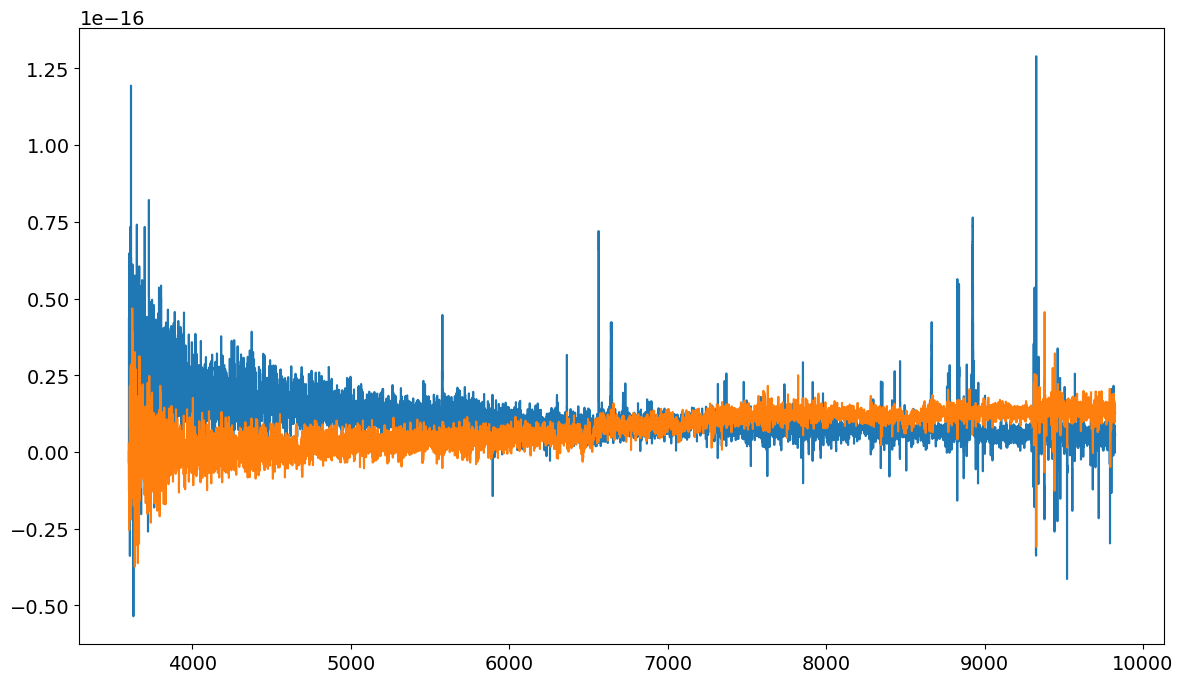

In [31]:
# Graficar una pareja
f, ax = plt.subplots()  
ax.step(specs[0].spectral_axis, specs[0].flux) 
ax.step(specs[1].spectral_axis, specs[1].flux)
plt.show()

<a class="anchor" id="plot"></a>
## Graficar espectros

In [32]:
def plot_spec(index, results):
    """
    Pase un valor de índice y el resultado del uso de client.retrieve()
    para graficar el espectro en el índice especificado.
    """
    
    record = results.records[index]

    sparcl_id = record.sparcl_id
    data_release = record.data_release
    flux = record.flux
    wavelength = record.wavelength
    model = record.model
    spectype = record.spectype
    redshift = record.redshift
    ra = record.ra
    dec = record.dec

    plt.title(f"Conjunto de datos = {data_release}\n"
              f"Tipo = {spectype}\n"
              f"ID = {sparcl_id}\n"
              f"Corrimiento al rojo = {redshift}\n"
              f"AR = {ra}\n"
              f"Dec = {dec}", loc='left')
    plt.xlabel('$\lambda\ [\AA]$')
    plt.ylabel('$f_{\lambda}$ $(10^{-17}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1})$')
    
    # Graficar el espectro sin suavizar en gris
    plt.plot(wavelength, flux, color='k', alpha=0.2, label='Espectro sin suavizar')
    
    # Espectro de overplot suavizado usando un kernel gaussiano 1-D en negro
    plt.plot(wavelength, convolve(flux, Gaussian1DKernel(5)), color='k', label='Espectro suavizado')
    
    # Graficar en rojo el espectro del modelo
    plt.plot(wavelength, model, color='r', label='Espectro modelo')
    
    plt.legend()
    plt.show()

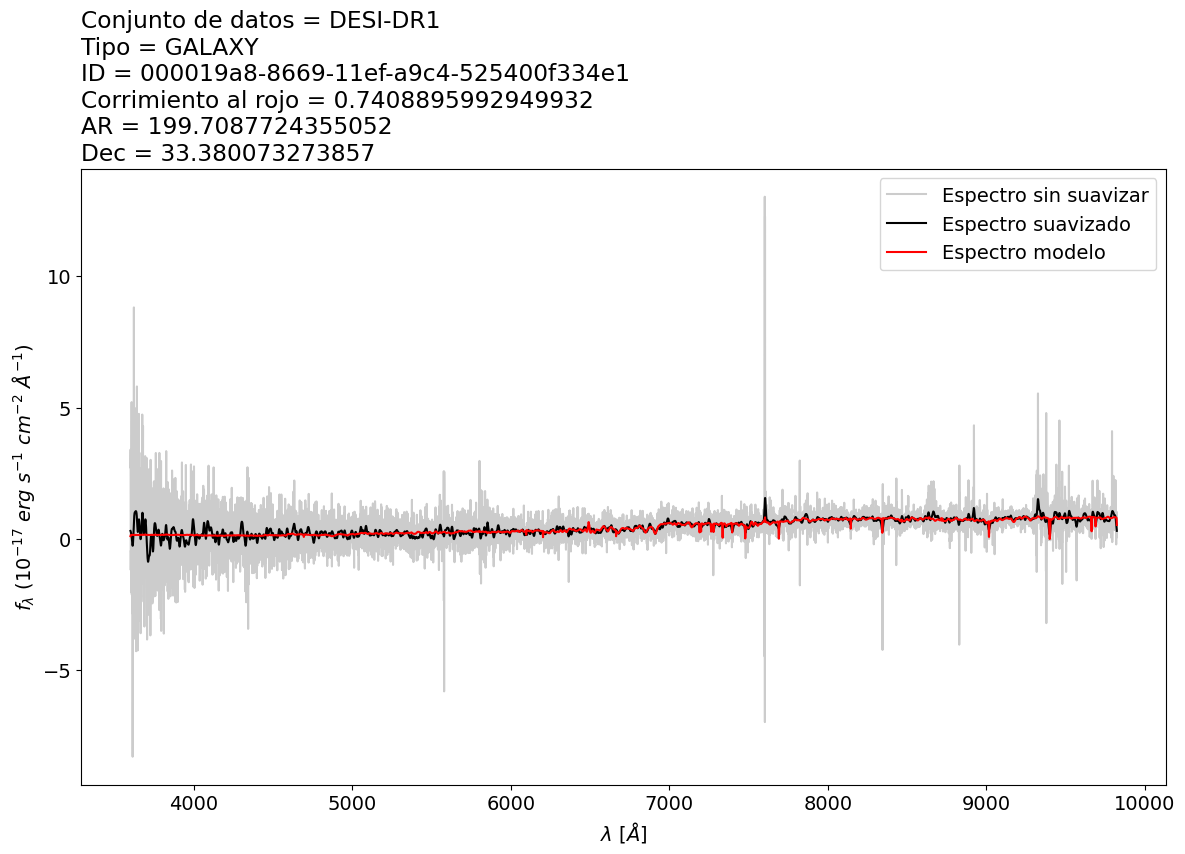

In [33]:
plot_spec(index=5, results=results_I)

<a class="anchor" id="missing"></a>
## Utilice `client.missing()` para encontrar los ID de SPARCL que faltan en la base de datos de SPARCL

In [35]:
client.missing?

Signature:
client.missing(
    uuid_list,
    *,
    dataset_list=None,
    countOnly=False,
    verbose=False,
)
Docstring:
Return the subset of sparcl_ids in the given uuid_list that are
NOT stored in the SPARCL database.

Args:
    uuid_list (:obj:`list`): List of sparcl_ids.

    dataset_list (:obj:`list`, optional): List of data sets from
        which to find missing sparcl_ids. Defaults to None, meaning
        all data sets hosted on the SPARCL database.

    countOnly (:obj:`bool`, optional): Set to True to return only
        a count of the missing sparcl_ids from the uuid_list.
        Defaults to False.

    verbose (:obj:`bool`, optional): Set to True for in-depth return
        statement. Defaults to False.

Returns:
    A list of the subset of sparcl_ids in the given uuid_list that
    are NOT stored in the SPARCL database.

Example:
    >>> client = SparclClient()
    >>> ids = ['ddbb57ee-8e90-4a0d-823b-0f5d97028076',]
    >>> client.missing(ids)
    ['ddbb57ee-8e90-4a0

#### Cuando intenta recuperar registros de la base de datos SPARCL con ID que no existen en la base de datos SPARCL, aparecerá un mensaje de advertencia:

In [34]:
ids_test = ['000025da-914b-4b67-b9a9-97cc811b0459',
            '0000fabc-0e15-4d76-b44c-4f152f31de09',
            '00001c20-b7ff-4367-af08-26432cd7e01d',
            '0000403e-51da-43b0-a0e9-e806ea31ca9e',
            'ddbb57ee-8e90-4a0d-823b-0f5d97028076']

res_test = client.retrieve(uuid_list=ids_test)

/tmp/ipykernel_439047/2568251338.py:7: UserWarning: Some UUIDs were not found. 5 out of the 5 requested uuids have no records available in the SPARCL database associated with DataSets {'DESI-DR1', 'BOSS-DR16', 'DESI-EDR', 'SDSS-DR16'}.Use "client.missing()" to get a list of the 5 unavailable uuids.
  res_test = client.retrieve(uuid_list=ids_test)


#### Para determinar cuáles de los ID de su lista no existen en la base de datos SPARCL, utilice el método `client.missing()`:

In [35]:
client.missing(uuid_list=ids_test)

['0000403e-51da-43b0-a0e9-e806ea31ca9e',
 '0000fabc-0e15-4d76-b44c-4f152f31de09',
 '000025da-914b-4b67-b9a9-97cc811b0459',
 'ddbb57ee-8e90-4a0d-823b-0f5d97028076',
 '00001c20-b7ff-4367-af08-26432cd7e01d']